In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as ply

import seaborn as sns

In [3]:
import dateutil
import datetime

In [4]:
data = pd.read_csv("execution_database.csv")

In [5]:
data.columns

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Number / Race / Sex of Victims',
       'State', 'Region', 'Method', 'Juvenile', 'Federal', 'Volunteer',
       'Foreign National', 'County'],
      dtype='object')

In [6]:
data.head()

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/04/1985,David Martin,32,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish
1,07/20/1993,Emma Danyliuk,-26,f,White,1 White Man,LA,S,Lethal Injection,No,No,No,No,Lafourche Parish
2,01/04/1995,Jesse Jacobs,44,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery
3,01/04/1996,Walter Correll,34,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin
4,01/04/2005,James Porter,33,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie


In [7]:
#clean data to ensure that there are no negative values for age. Replace  Fake negative value added to show effect.
s = data["Age"]
s.mask(s < 0, data["Age"].mean(), inplace = True)

In [8]:
data

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/04/1985,David Martin,32.000000,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish
1,07/20/1993,Emma Danyliuk,41.392907,f,White,1 White Man,LA,S,Lethal Injection,No,No,No,No,Lafourche Parish
2,01/04/1995,Jesse Jacobs,44.000000,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery
3,01/04/1996,Walter Correll,34.000000,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin
4,01/04/2005,James Porter,33.000000,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12/17/2013,Johnny Black,48.000000,m,White,1 White Male(s),OK,S,Lethal Injection,No,No,No,No,Stephens
1434,12/18/1986,Richard Andrade,25.000000,m,Latino,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Nueces
1435,12/18/1998,Andy Smith,38.000000,m,Black,1 Black Male(s)1 Black Female(s),SC,S,Lethal Injection,No,No,No,No,Anderson
1436,12/19/2000,David Johnson,37.000000,m,Black,1 Black Male(s),AR,S,Lethal Injection,No,No,No,No,Pulaski


In [9]:
data = data[data.Name != "Emma Danyliuk"]

In [10]:
data

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County
0,01/04/1985,David Martin,32.0,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish
2,01/04/1995,Jesse Jacobs,44.0,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery
3,01/04/1996,Walter Correll,34.0,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin
4,01/04/2005,James Porter,33.0,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie
5,01/05/1993,Westley Dodd,31.0,m,White,3 White Male(s),WA,W,Hanging,No,No,Yes,No,Clark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12/17/2013,Johnny Black,48.0,m,White,1 White Male(s),OK,S,Lethal Injection,No,No,No,No,Stephens
1434,12/18/1986,Richard Andrade,25.0,m,Latino,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Nueces
1435,12/18/1998,Andy Smith,38.0,m,Black,1 Black Male(s)1 Black Female(s),SC,S,Lethal Injection,No,No,No,No,Anderson
1436,12/19/2000,David Johnson,37.0,m,Black,1 Black Male(s),AR,S,Lethal Injection,No,No,No,No,Pulaski


In [11]:
data.info()
#seeing if there are any float/int values that I could plot vs each other to show any relationship. 
#only one int object, so this cannot be done.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1437
Data columns (total 14 columns):
Date                              1437 non-null object
Name                              1437 non-null object
Age                               1437 non-null float64
Sex                               1437 non-null object
Race                              1437 non-null object
Number / Race / Sex of Victims    1437 non-null object
State                             1437 non-null object
Region                            1437 non-null object
Method                            1437 non-null object
Juvenile                          1437 non-null object
Federal                           1437 non-null object
Volunteer                         1437 non-null object
Foreign National                  1437 non-null object
County                            1435 non-null object
dtypes: float64(1), object(13)
memory usage: 168.4+ KB


In [12]:
data["Sex"].value_counts()
#trying to determine if most people sentenced to death from 1977 onwards were male or female.

m    1421
f      16
Name: Sex, dtype: int64

In [34]:
data["State"].value_counts().head(5)
#Texas has by far executed the most people. Then Oklahoma + Virginia then Florida then Missouri. 
#Oklahoma, Virginia, Florida, and Missouri have in total executed less than Texas.
#Texas has executed 1 person ~4 weeks since 1977 and represents 37% of the total executions since 1977.

TX    537
OK    112
VA    111
FL     92
MO     87
Name: State, dtype: int64

In [33]:
data["Age"].describe()
#avg age is 42 and youngest executed is 22 while oldest is 77. This is age of execution, not crime.

count    1437.000000
mean       41.439805
std         9.457280
min        22.000000
25%        34.000000
50%        40.000000
75%        47.000000
max        77.000000
Name: Age, dtype: float64

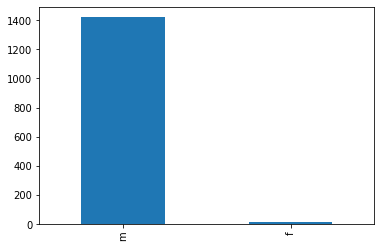

In [13]:
data["Sex"].value_counts().plot.bar()

In [14]:
data["Method"].value_counts() #look at the most common methods used (as of now only lethal injection can be used)

Lethal Injection    1262
Electrocution        158
Gas Chamber           11
Firing Squad           3
Hanging                3
Name: Method, dtype: int64

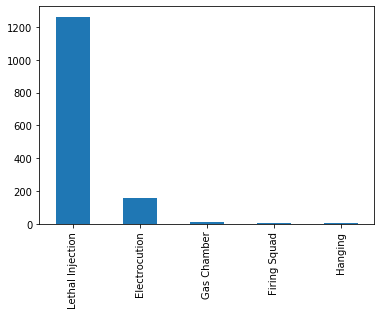

In [15]:
data["Method"].value_counts().plot.bar()

In [16]:
data["Date"].value_counts()

12/09/1999    4
01/08/1997    3
08/28/1987    3
08/03/1994    3
02/24/1999    3
             ..
06/04/2008    1
05/16/1995    1
04/17/2003    1
09/25/1998    1
05/10/1984    1
Name: Date, Length: 1282, dtype: int64

In [17]:
#determine if exeuctions have decreased over the years.
#determine if there are certain months where people are more likely to be executed

In [18]:
data["Year"] = pd.DatetimeIndex(data["Date"]).year
#add column to show year.

/Users/emmadanyliuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County,Year
0,01/04/1985,David Martin,32.0,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish,1985
2,01/04/1995,Jesse Jacobs,44.0,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery,1995
3,01/04/1996,Walter Correll,34.0,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin,1996
4,01/04/2005,James Porter,33.0,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie,2005
5,01/05/1993,Westley Dodd,31.0,m,White,3 White Male(s),WA,W,Hanging,No,No,Yes,No,Clark,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12/17/2013,Johnny Black,48.0,m,White,1 White Male(s),OK,S,Lethal Injection,No,No,No,No,Stephens,2013
1434,12/18/1986,Richard Andrade,25.0,m,Latino,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Nueces,1986
1435,12/18/1998,Andy Smith,38.0,m,Black,1 Black Male(s)1 Black Female(s),SC,S,Lethal Injection,No,No,No,No,Anderson,1998
1436,12/19/2000,David Johnson,37.0,m,Black,1 Black Male(s),AR,S,Lethal Injection,No,No,No,No,Pulaski,2000


In [20]:
data["Month"] = pd.DatetimeIndex(data["Date"]).month

/Users/emmadanyliuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


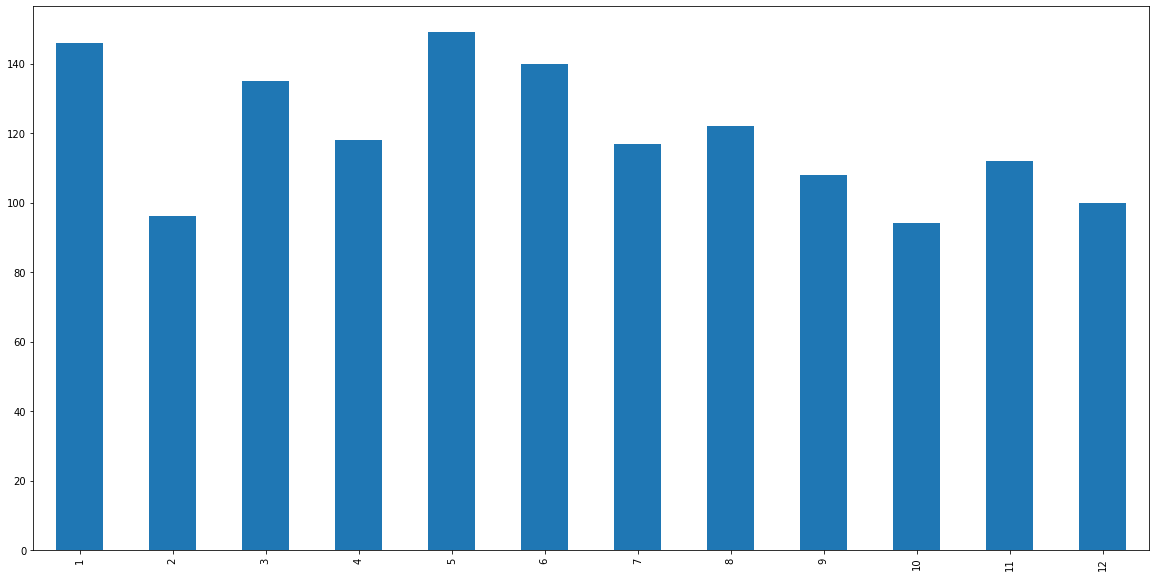

In [38]:
data["Month"].value_counts().sort_index().plot.bar()
#appears to be fairly random. Looks like exeuctions are slightly skewed to the first half of the year.

In [21]:
data

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County,Year,Month
0,01/04/1985,David Martin,32.0,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish,1985,1
2,01/04/1995,Jesse Jacobs,44.0,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery,1995,1
3,01/04/1996,Walter Correll,34.0,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin,1996,1
4,01/04/2005,James Porter,33.0,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie,2005,1
5,01/05/1993,Westley Dodd,31.0,m,White,3 White Male(s),WA,W,Hanging,No,No,Yes,No,Clark,1993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12/17/2013,Johnny Black,48.0,m,White,1 White Male(s),OK,S,Lethal Injection,No,No,No,No,Stephens,2013,12
1434,12/18/1986,Richard Andrade,25.0,m,Latino,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Nueces,1986,12
1435,12/18/1998,Andy Smith,38.0,m,Black,1 Black Male(s)1 Black Female(s),SC,S,Lethal Injection,No,No,No,No,Anderson,1998,12
1436,12/19/2000,David Johnson,37.0,m,Black,1 Black Male(s),AR,S,Lethal Injection,No,No,No,No,Pulaski,2000,12


In [22]:
data["Year"].value_counts().sort_index()
#Find a way to get the year to be in order and not the number (ie axis should be the years in like the right order. also make this a dot plot)

1977     1
1979     2
1981     1
1982     2
1983     5
1984    21
1985    18
1986    18
1987    25
1988    11
1989    16
1990    23
1991    14
1992    31
1993    38
1994    31
1995    56
1996    45
1997    74
1998    68
1999    98
2000    85
2001    66
2002    71
2003    65
2004    59
2005    60
2006    53
2007    42
2008    37
2009    52
2010    46
2011    43
2012    43
2013    39
2014    35
2015    28
2016    15
Name: Year, dtype: int64

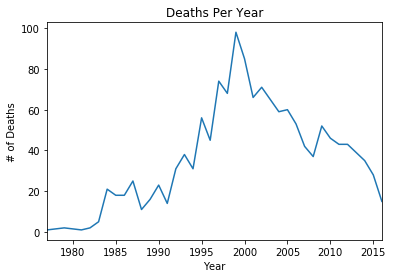

In [23]:
death_sentence = data["Year"].value_counts().sort_index()
death_sentence.plot()
ply.title('Deaths Per Year')
ply.ylabel('# of Deaths')
ply.xlabel('Year')
ply.rcParams['figure.figsize'] = (20.0, 10.0)
#no deaths for 1978 or 1980. Ramps up until 2000 anbd then decline.

In [24]:
def victims(people):
    victim_total = 0
    for idx in range(len(people)):
        if people[idx].isnumeric() and people[idx + 1] == " " and people[idx - 1].isnumeric() == False:
            victim_total += int(people[idx])
        elif people[idx].isnumeric() and people[idx + 1].isnumeric() and people[idx + 2] == " " and people[idx - 1].isnumeric() == False:
            victim_total += int(people[idx] + people[idx+1])
        elif people[idx].isnumeric() and people[idx + 1].isnumeric() and people[idx + 2].isnumeric() and people[idx + 3] == " " and people[idx - 1].isnumeric() == False:
            victim_total += int(people[idx] + people[idx+1] + people[idx+2])
        else:
            victim_total += 0
    
    return victim_total
#trying to make a function to get the total number of victims so that it can be plotted.
#Must be able to account for mass killers (ie more than double digit male or female)

In [25]:
data["Victim Total"] = data["Number / Race / Sex of Victims"]

/Users/emmadanyliuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County,Year,Month,Victim Total
0,01/04/1985,David Martin,32.0,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish,1985,1,2 White Male(s)2 White Female(s)
2,01/04/1995,Jesse Jacobs,44.0,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery,1995,1,1 White Female(s)
3,01/04/1996,Walter Correll,34.0,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin,1996,1,1 White Male(s)
4,01/04/2005,James Porter,33.0,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie,2005,1,1 Latino Male(s)
5,01/05/1993,Westley Dodd,31.0,m,White,3 White Male(s),WA,W,Hanging,No,No,Yes,No,Clark,1993,1,3 White Male(s)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12/17/2013,Johnny Black,48.0,m,White,1 White Male(s),OK,S,Lethal Injection,No,No,No,No,Stephens,2013,12,1 White Male(s)
1434,12/18/1986,Richard Andrade,25.0,m,Latino,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Nueces,1986,12,1 Latino Female(s)
1435,12/18/1998,Andy Smith,38.0,m,Black,1 Black Male(s)1 Black Female(s),SC,S,Lethal Injection,No,No,No,No,Anderson,1998,12,1 Black Male(s)1 Black Female(s)
1436,12/19/2000,David Johnson,37.0,m,Black,1 Black Male(s),AR,S,Lethal Injection,No,No,No,No,Pulaski,2000,12,1 Black Male(s)


In [27]:
data["Victim Total"] = data["Victim Total"].apply(victims) #apply allows you to pass in a function

/Users/emmadanyliuk/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
data

,Date,Name,Age,Sex,Race,Number / Race / Sex of Victims,State,Region,Method,Juvenile,Federal,Volunteer,Foreign National,County,Year,Month,Victim Total
0,01/04/1985,David Martin,32.0,m,White,2 White Male(s)2 White Female(s),LA,S,Electrocution,No,No,No,No,Lafourche Parish,1985,1,4
2,01/04/1995,Jesse Jacobs,44.0,m,White,1 White Female(s),TX,S,Lethal Injection,No,No,No,No,Montgomery,1995,1,1
3,01/04/1996,Walter Correll,34.0,m,White,1 White Male(s),VA,S,Lethal Injection,No,No,No,No,Franklin,1996,1,1
4,01/04/2005,James Porter,33.0,m,White,1 Latino Male(s),TX,S,Lethal Injection,No,No,Yes,No,Bowie,2005,1,1
5,01/05/1993,Westley Dodd,31.0,m,White,3 White Male(s),WA,W,Hanging,No,No,Yes,No,Clark,1993,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,12/17/2013,Johnny Black,48.0,m,White,1 White Male(s),OK,S,Lethal Injection,No,No,No,No,Stephens,2013,12,1
1434,12/18/1986,Richard Andrade,25.0,m,Latino,1 Latino Female(s),TX,S,Lethal Injection,No,No,No,No,Nueces,1986,12,1
1435,12/18/1998,Andy Smith,38.0,m,Black,1 Black Male(s)1 Black Female(s),SC,S,Lethal Injection,No,No,No,No,Anderson,1998,12,2
1436,12/19/2000,David Johnson,37.0,m,Black,1 Black Male(s),AR,S,Lethal Injection,No,No,No,No,Pulaski,2000,12,1


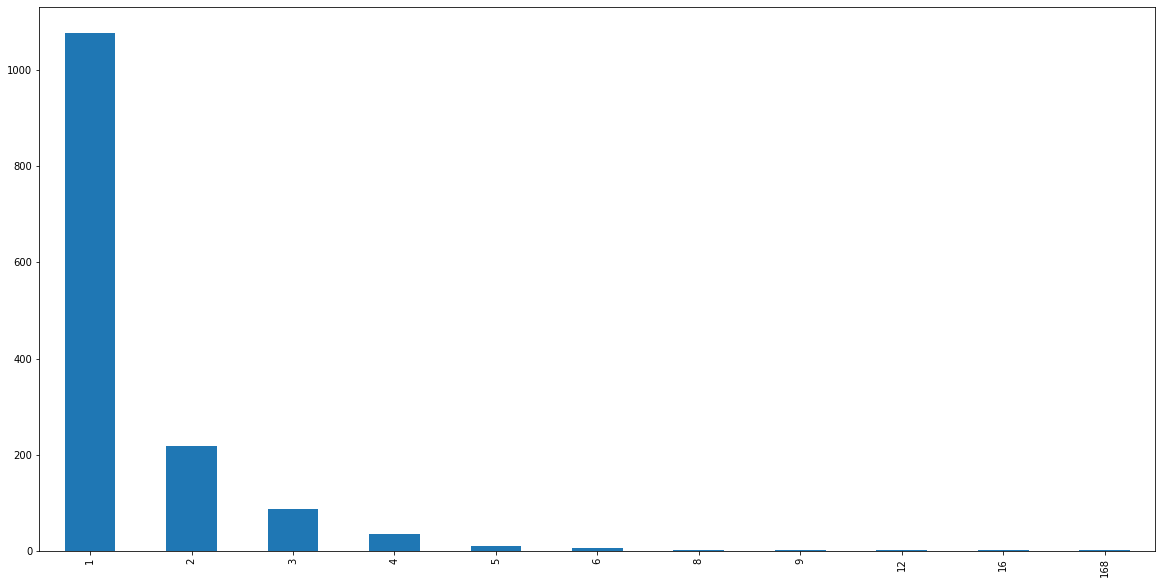

In [30]:
data["Victim Total"].value_counts().sort_index().plot.bar()

In [31]:
data["Victim Total"].value_counts().sort_index()

1      1077
2       218
3        86
4        34
5        11
6         6
8         1
9         1
12        1
16        1
168       1
Name: Victim Total, dtype: int64